<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/UKRAINE_AND_RUSSIA_WAR_X_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THR NECCESITIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("/content/filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

In [3]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [4]:
data = data[["username", "tweet", "language"]]

In [5]:
data.isnull().sum()

,0
username,0
tweet,0
language,0


***So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:***

In [6]:
data["language"].value_counts()

,count
language,
en,8858
pt,440
it,194
qme,105
und,60
in,47
ru,44
ja,42
es,36


***So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:***

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:***

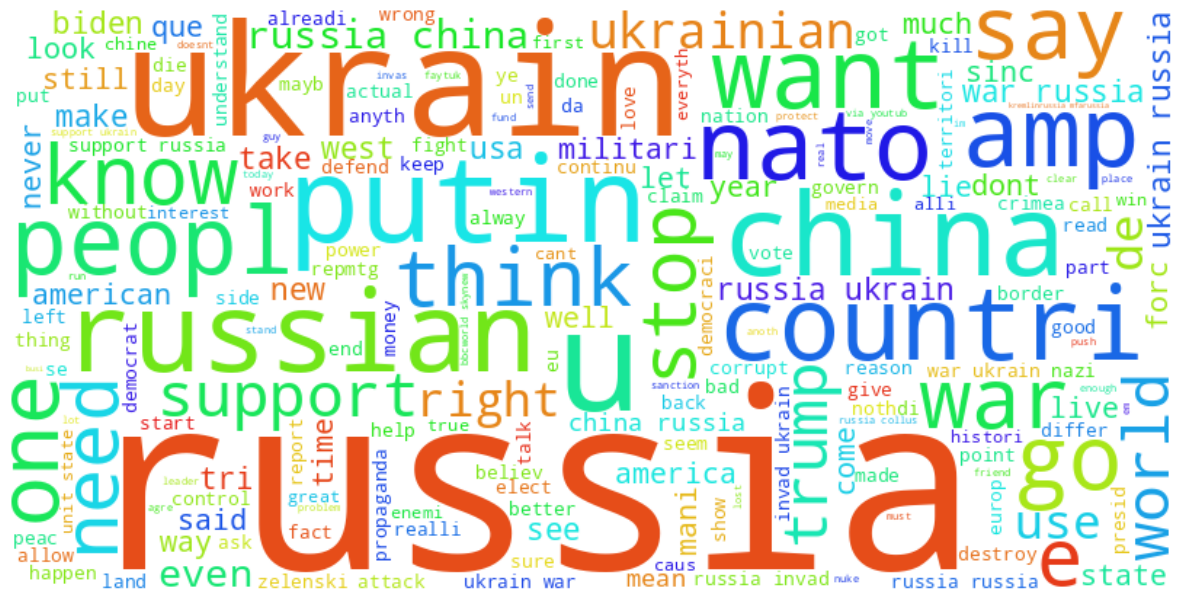

In [9]:
import random
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({random.randint(0, 255)}, 80%, 50%)"  # Creates vibrant colors in random hues
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    color_func=custom_color_func,
    width=800,
    height=400
).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3       mainelif baddcompani it alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


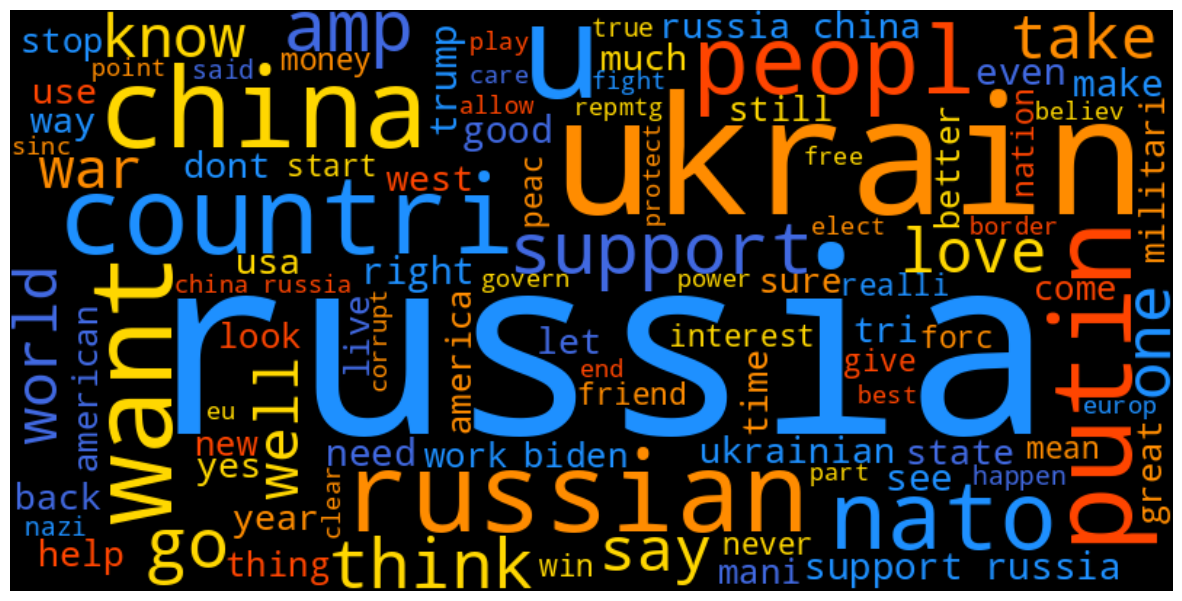

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random
# Prepare positive words from tweets
positive = ' '.join(i for i in data['tweet'][data['Positive'] > data['Negative']])
# Set stopwords
stopwords = set(STOPWORDS)
# Define an advanced color function for a luxurious look
def luxurious_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Using vibrant shades of gold and blue for a "sexy" feel
    colors = ["#FFD700", "#FF8C00", "#1E90FF", "#4169E1", "#FF4500"]  # Golds and blues
    return random.choice(colors)
# Generate the word cloud with the luxurious color function
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="black",  # A black background enhances contrast
    color_func=luxurious_color_func,
    width=800,
    height=400,
    max_words=100  # Limit words for a cleaner appearance
).generate(positive)
# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

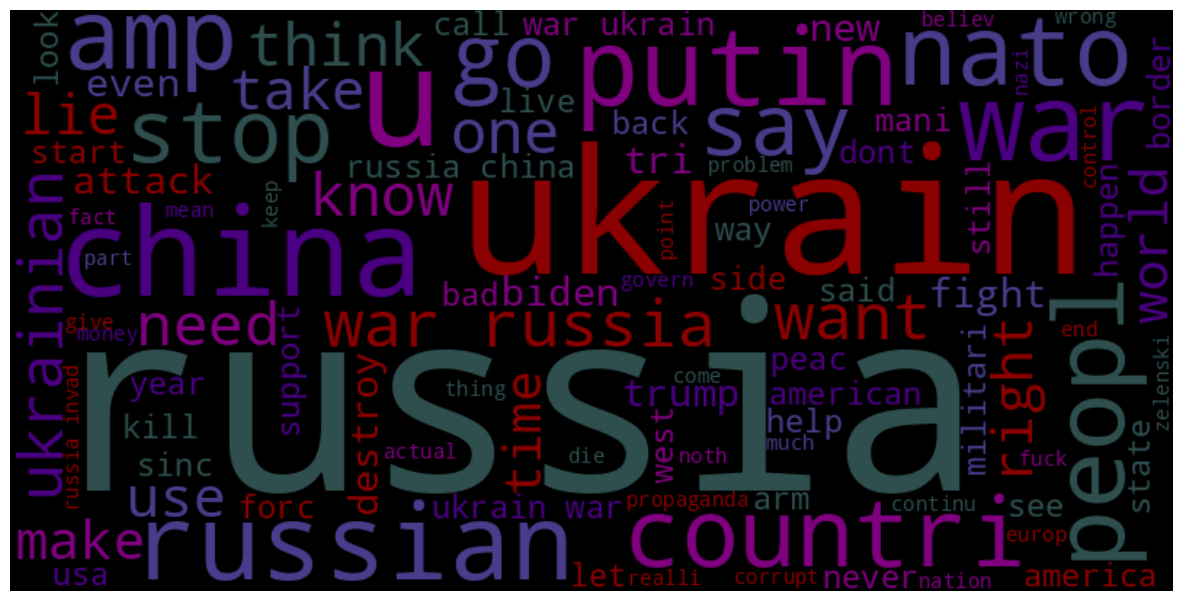

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random

# Prepare negative words from tweets
negative = ' '.join(i for i in data['tweet'][data['Negative'] > data['Positive']])

# Set stopwords
stopwords = set(STOPWORDS)

# Define an advanced color function for a bold, intense look
def intense_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Using deep shades to convey a sense of intensity
    colors = ["#8B0000", "#4B0082", "#2F4F4F", "#800080", "#483D8B"]  # Dark red, indigo, dark slate, purple, dark blue
    return random.choice(colors)

# Generate the word cloud with the custom color function
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="black",  # Dark background enhances the intensity
    color_func=intense_color_func,
    width=800,
    height=400,
    max_words=100  # Keep it clean and focused
).generate(negative)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


***So this is how you can analyze the sentiments of people over the Ukraine and Russia war. I hope this war gets over soon and things get back to normal.***